<a href="https://colab.research.google.com/github/utsavdatta-git/GENERATING-AND-MODIFYING-IMAGES-BASED-ON-ITERATIVE-INSTRUCTIONS/blob/master/Generating_images_from_scene_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Generation from Scene Graphs
***By Justin Johnson, Agrim Gupta, Li Fei-Fei***



## Prerequisites

### Clone code

In [0]:
#@title Cloning sg2im github repo {display-mode: "form"}
!git clone https://github.com/google/sg2im.git

Cloning into 'sg2im'...
remote: Enumerating objects: 85, done.
remote: Total 85 (delta 0), reused 0 (delta 0), pack-reused 85
Unpacking objects: 100% (85/85), done.


### Download pretrained models

In [0]:
#@title downloading pretrained models {display-mode: "form"}
!sh "/content/sg2im/scripts/download_full_models.sh"

--2019-11-12 23:52:38--  https://storage.googleapis.com/sg2im-data/full/coco64.pt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 809109670 (772M) [application/octet-stream]
Saving to: ‘sg2im-models/full/coco64.pt’

sg2im-models/full/c 100%[===================>] 771.63M  97.0MB/s    in 8.4s    

2019-11-12 23:52:47 (92.2 MB/s) - ‘sg2im-models/full/coco64.pt’ saved [809109670/809109670]

--2019-11-12 23:52:47--  https://storage.googleapis.com/sg2im-data/full/coco64_no_gconv.pt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472158519 (450M) [application/octet-stream]
Saving to: ‘sg2im

In [0]:
import os
import sys
os.chdir("/content/sg2im/")
sys.path.append("/content/sg2im/")

### Download Scene Graph parser

In [0]:
!wget https://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip
!wget https://nlp.stanford.edu/projects/scenegraph/scenegraph-1.0.jar

--2019-11-12 23:55:01--  https://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 403157240 (384M) [application/zip]
Saving to: ‘stanford-corenlp-full-2015-12-09.zip’

stanford-corenlp-fu 100%[===================>] 384.48M  7.88MB/s    in 23s     

2019-11-12 23:55:24 (16.5 MB/s) - ‘stanford-corenlp-full-2015-12-09.zip’ saved [403157240/403157240]

--2019-11-12 23:55:26--  https://nlp.stanford.edu/projects/scenegraph/scenegraph-1.0.jar
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164039 (160K) [application/x-java-archive]
Saving to: ‘scenegraph-1.0.jar’

scenegraph-1.0.jar  100%[===================>] 160.19K   379KB/s    

In [0]:
!unzip /content/sg2im/stanford-corenlp-full-2015-12-09.zip

Archive:  /content/sg2im/stanford-corenlp-full-2015-12-09.zip
   creating: stanford-corenlp-full-2015-12-09/
  inflating: stanford-corenlp-full-2015-12-09/xom-1.2.10-src.jar  
  inflating: stanford-corenlp-full-2015-12-09/CoreNLP-to-HTML.xsl  
  inflating: stanford-corenlp-full-2015-12-09/README.txt  
  inflating: stanford-corenlp-full-2015-12-09/LIBRARY-LICENSES  
   creating: stanford-corenlp-full-2015-12-09/sutime/
  inflating: stanford-corenlp-full-2015-12-09/sutime/defs.sutime.txt  
  inflating: stanford-corenlp-full-2015-12-09/sutime/english.sutime.txt  
  inflating: stanford-corenlp-full-2015-12-09/sutime/english.holidays.sutime.txt  
 extracting: stanford-corenlp-full-2015-12-09/ejml-0.23-src.zip  
  inflating: stanford-corenlp-full-2015-12-09/input.txt.xml  
  inflating: stanford-corenlp-full-2015-12-09/build.xml  
  inflating: stanford-corenlp-full-2015-12-09/pom.xml  
  inflating: stanford-corenlp-full-2015-12-09/stanford-corenlp-3.6.0.jar  
   creating: stanford-corenlp-ful

In [0]:
!cp /content/sg2im/scenegraph-1.0.jar /content/sg2im/stanford-corenlp-full-2015-12-09

In [0]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Downloading code from google drive
file_ids = [('1pwiIV3VhxLtLbChwdCiRK284xOGNW9e8', 'TextToSG.class'),
           ('1Lp2UrBxA5L12fXYgS49arC8SIzLpIyBM', 'json-simple-1.1.jar')] # URL id.
for file_id, file_name in file_ids:
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_name)

In [0]:
!mv /content/sg2im/json-simple-1.1.jar /content/sg2im/stanford-corenlp-full-2015-12-09
!mv /content/sg2im/TextToSG.class /content/sg2im/stanford-corenlp-full-2015-12-09

## Evaluate pretrained model

### Parse text to scene graph

In [0]:
import os
import sys
import json

#@title Model Parameters
checkpoint = "/content/sg2im-models/full/vg128.pt" #@param ["/content/sg2im-models/full/coco64.pt", "/content/sg2im-models/full/vg128.pt", "/content/sg2im-models/full/vg64.pt"]
scene_graphs_json = 'scene_graphs/scenegraph.json' #@param {type:"string"}
output_dir = '/content/output' #@param {type:"string"}
draw_scene_graphs = 1 #@param {type:"integer"}
device = "gpu" #@param ["gpu", "cpu"]
text_to_parse = "A man by a sheep." #@param {type:"string"}
text_to_parse_java = '"'+text_to_parse+'"'

os.chdir("/content/sg2im/stanford-corenlp-full-2015-12-09")
!/usr/lib/jvm/java-8-openjdk-amd64/bin/java -mx2g -cp .:"*" TextToSG $text_to_parse_java

with open("/content/sg2im/stanford-corenlp-full-2015-12-09/scenegraph.json", 'r') as sg:
  graph = json.load(sg)
  relationships = [[relation['subject'],relation['predicate'], relation['object']] for relation in graph['relationships']]
  objects = [object["names"][0] for object in graph['objects']]
  scene_graph = {}
  scene_graph['relationships'] = relationships
  scene_graph['objects'] = objects
  with open('/content/sg2im/scene_graphs/scenegraph.json', 'w') as sg_out:
    sg_out.write(json.dumps([scene_graph]))

os.chdir("/content/sg2im/")





[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - TokenizerAnnotator: No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... 
done [0.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.6 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [0.7 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.conll.4class.distsi

### Generated image from parsed scene graph

A man by a sheep.


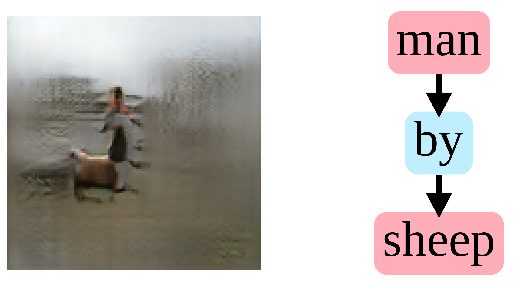

In [0]:
#@title Visualize results {display-mode: "form"}
#!/usr/bin/python
#
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import argparse, json, os

from imageio import imwrite
import torch

from sg2im.model import Sg2ImModel
from sg2im.data.utils import imagenet_deprocess_batch
import sg2im.vis as vis

class argsClass:
  def __init__(self, checkpoint='sg2im-models/vg128.pt',
               scene_graphs_json='scene_graphs/figure_6_sheep.json',
               output_dir='outputs',
               draw_scene_graphs=0,
               device='gpu'):
    self.checkpoint = checkpoint
    self.scene_graphs_json=scene_graphs_json
    self.output_dir=output_dir
    self.draw_scene_graphs=draw_scene_graphs
    self.device=device


def main(args):
  if not os.path.isfile(args.checkpoint):
    print('ERROR: Checkpoint file "%s" not found' % args.checkpoint)
    print('Maybe you forgot to download pretraind models? Try running:')
    print('bash scripts/download_models.sh')
    return

  if not os.path.isdir(args.output_dir):
    print('Output directory "%s" does not exist; creating it' % args.output_dir)
    os.makedirs(args.output_dir)

  if args.device == 'cpu':
    device = torch.device('cpu')
  elif args.device == 'gpu':
    device = torch.device('cuda:0')
    if not torch.cuda.is_available():
      print('WARNING: CUDA not available; falling back to CPU')
      device = torch.device('cpu')

  # Load the model, with a bit of care in case there are no GPUs
  map_location = 'cpu' if device == torch.device('cpu') else None
  checkpoint = torch.load(args.checkpoint, map_location=map_location)
  model = Sg2ImModel(**checkpoint['model_kwargs'])
  model.load_state_dict(checkpoint['model_state'])
  model.eval()
  model.to(device)

  # Load the scene graphs
  with open(args.scene_graphs_json, 'r') as f:
    scene_graphs = json.load(f)

  # Run the model forward
  with torch.no_grad():
    imgs, boxes_pred, masks_pred, _ = model.forward_json(scene_graphs)
  imgs = imagenet_deprocess_batch(imgs)

  # Save the generated images
  for i in range(imgs.shape[0]):
    img_np = imgs[i].numpy().transpose(1, 2, 0)
    img_path = os.path.join(args.output_dir, 'img%06d.png' % i)
    imwrite(img_path, img_np)

  # Draw the scene graphs
  if args.draw_scene_graphs == 1:
    for i, sg in enumerate(scene_graphs):
      sg_img = vis.draw_scene_graph(sg['objects'], sg['relationships'])
      sg_img_path = os.path.join(args.output_dir, 'sg%06d.png' % i)
      imwrite(sg_img_path, sg_img)


if __name__ == '__main__':
  args = argsClass(checkpoint=checkpoint,
                   scene_graphs_json=scene_graphs_json,
                   output_dir=output_dir,
                   draw_scene_graphs=draw_scene_graphs,
                   device=device)
  main(args)
  from IPython.display import clear_output
  clear_output()
  import matplotlib.pyplot as plt
  %matplotlib inline
  print(text_to_parse)
  with open(scene_graphs_json, 'r') as sg_json:
    sgs = json.load(sg_json)
    #plt.subplots(2, len(sgs))
    plt.figure(figsize=(10 * len(sgs),5 * len(sgs)))
    plt.axis('off')
    for i in range(len(sgs)):
      plt.subplot(len(sgs), 2 ,2 * i + 1)
      img = plt.imread(output_dir + '/img00000'+str(i)+'.png')
      plt.imshow(img)
      plt.axis('off')
      plt.subplot(len(sgs), 2,2 * i + 2)
      img = plt.imread(output_dir + '/sg00000'+str(i)+'.png')
      plt.imshow(img)
      plt.axis('off')

## Train model

#### Downloading dataset

In [0]:
os.chdir("/content/")
!git clone https://github.com/cocodataset/cocoapi.git
os.chdir("/content/cocoapi/PythonAPI/")
!python setup.py install


Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 33.71 MiB/s, done.
Resolving deltas: 100% (570/570), done.
running install
running bdist_egg
running egg_info
creating pycocotools.egg-info
writing pycocotools.egg-info/PKG-INFO
writing dependency_links to pycocotools.egg-info/dependency_links.txt
writing requirements to pycocotools.egg-info/requires.txt
writing top-level names to pycocotools.egg-info/top_level.txt
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.6/pycocotools
copy

In [0]:
os.chdir("/content/sg2im/")
!sh scripts/download_vg.sh

--2019-10-15 05:59:40--  https://visualgenome.org/static/data/dataset/objects.json.zip
Resolving visualgenome.org (visualgenome.org)... 54.87.32.87
Connecting to visualgenome.org (visualgenome.org)|54.87.32.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55323929 (53M) [application/zip]
Saving to: ‘datasets/vg/objects.json.zip’

datasets/vg/objects 100%[===================>]  52.76M  53.7MB/s    in 1.0s    

2019-10-15 05:59:41 (53.7 MB/s) - ‘datasets/vg/objects.json.zip’ saved [55323929/55323929]

--2019-10-15 05:59:41--  https://visualgenome.org/static/data/dataset/attributes.json.zip
Resolving visualgenome.org (visualgenome.org)... 54.87.32.87
Connecting to visualgenome.org (visualgenome.org)|54.87.32.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83280561 (79M) [application/zip]
Saving to: ‘datasets/vg/attributes.json.zip’

datasets/vg/attribu 100%[===================>]  79.42M  65.2MB/s    in 1.2s    

2019-10-15 05:59:43 

### Preprocess dataset

In [0]:
#!/usr/bin/python
#
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import argparse, json, os
from collections import Counter, defaultdict

import numpy as np
import h5py

from matplotlib.pyplot import imread


"""
vocab for objects contains a special entry "__image__" intended to be used for
dummy nodes encompassing the entire image; vocab for predicates includes a
special entry "__in_image__" to be used for dummy relationships making the graph
fully-connected.
"""


VG_DIR = 'datasets/vg'

parser = argparse.ArgumentParser()

# Input data
parser.add_argument('--splits_json', default='sg2im/data/vg_splits.json')
parser.add_argument('--images_json',
    default=os.path.join(VG_DIR, 'image_data.json'))
parser.add_argument('--objects_json',
    default=os.path.join(VG_DIR, 'objects.json'))
parser.add_argument('--attributes_json',
    default=os.path.join(VG_DIR, 'attributes.json'))
parser.add_argument('--object_aliases',
    default=os.path.join(VG_DIR, 'object_alias.txt'))
parser.add_argument('--relationship_aliases',
    default=os.path.join(VG_DIR, 'relationship_alias.txt'))
parser.add_argument('--relationships_json',
    default=os.path.join(VG_DIR, 'relationships.json'))

# Arguments for images
parser.add_argument('--min_image_size', default=200, type=int)
parser.add_argument('--train_split', default='train')

# Arguments for objects
parser.add_argument('--min_object_instances', default=2000, type=int)
parser.add_argument('--min_attribute_instances', default=2000, type=int)
parser.add_argument('--min_object_size', default=32, type=int)
parser.add_argument('--min_objects_per_image', default=3, type=int)
parser.add_argument('--max_objects_per_image', default=30, type=int)
parser.add_argument('--max_attributes_per_image', default=30, type=int)

# Arguments for relationships
parser.add_argument('--min_relationship_instances', default=500, type=int)
parser.add_argument('--min_relationships_per_image', default=1, type=int)
parser.add_argument('--max_relationships_per_image', default=30, type=int)

# Output
parser.add_argument('--output_vocab_json',
    default=os.path.join(VG_DIR, 'vocab.json'))
parser.add_argument('--output_h5_dir', default=VG_DIR)


def main(args):
  print('Loading image info from "%s"' % args.images_json)
  with open(args.images_json, 'r') as f:
    images = json.load(f)
  image_id_to_image = {i['image_id']: i for i in images}

  with open(args.splits_json, 'r') as f:
    splits = json.load(f)

  # Filter images for being too small
  splits = remove_small_images(args, image_id_to_image, splits)

  obj_aliases = load_aliases(args.object_aliases)
  rel_aliases = load_aliases(args.relationship_aliases)

  print('Loading objects from "%s"' % args.objects_json)
  with open(args.objects_json, 'r') as f:
    objects = json.load(f)

  # Vocab for objects and relationships
  vocab = {}
  train_ids = splits[args.train_split]
  create_object_vocab(args, train_ids, objects, obj_aliases, vocab)

  print('Loading attributes from "%s"' % args.attributes_json)
  with open(args.attributes_json, 'r') as f:
    attributes = json.load(f)

  # Vocab for attributes
  create_attribute_vocab(args, train_ids, attributes, vocab)

  object_id_to_obj = filter_objects(args, objects, obj_aliases, vocab, splits)
  print('After filtering there are %d object instances'
        % len(object_id_to_obj))

  print('Loading relationshps from "%s"' % args.relationships_json)
  with open(args.relationships_json, 'r') as f:
    relationships = json.load(f)

  create_rel_vocab(args, train_ids, relationships, object_id_to_obj,
                   rel_aliases, vocab)

  print('Encoding objects and relationships ...')
  numpy_arrays = encode_graphs(args, splits, objects, relationships, vocab,
                               object_id_to_obj, attributes)

  print('Writing HDF5 output files')
  for split_name, split_arrays in numpy_arrays.items():
    image_ids = list(split_arrays['image_ids'].astype(int))
    h5_path = os.path.join(args.output_h5_dir, '%s.h5' % split_name)
    print('Writing file "%s"' % h5_path)
    with h5py.File(h5_path, 'w') as h5_file:
      for name, ary in split_arrays.items():
        print('Creating datset: ', name, ary.shape, ary.dtype)
        h5_file.create_dataset(name, data=ary)
      print('Writing image paths')
      image_paths = get_image_paths(image_id_to_image, image_ids)
      path_dtype = h5py.special_dtype(vlen=str)
      path_shape = (len(image_paths),)
      path_dset = h5_file.create_dataset('image_paths', path_shape,
                                         dtype=path_dtype)
      for i, p in enumerate(image_paths):
        path_dset[i] = p
    print()

  print('Writing vocab to "%s"' % args.output_vocab_json)
  with open(args.output_vocab_json, 'w') as f:
    json.dump(vocab, f)

def remove_small_images(args, image_id_to_image, splits):
  new_splits = {}
  for split_name, image_ids in splits.items():
    new_image_ids = []
    num_skipped = 0
    for image_id in image_ids:
      image = image_id_to_image[image_id]
      height, width = image['height'], image['width']
      if min(height, width) < args.min_image_size:
        num_skipped += 1
        continue
      new_image_ids.append(image_id)
    new_splits[split_name] = new_image_ids
    print('Removed %d images from split "%s" for being too small' %
          (num_skipped, split_name))

  return new_splits


def get_image_paths(image_id_to_image, image_ids):
  paths = []
  for image_id in image_ids:
    image = image_id_to_image[image_id]
    base, filename = os.path.split(image['url'])
    path = os.path.join(os.path.basename(base), filename)
    paths.append(path)
  return paths


def handle_images(args, image_ids, h5_file):
  with open(args.images_json, 'r') as f:
    images = json.load(f)
  if image_ids:
    image_ids = set(image_ids)

  image_heights, image_widths = [], []
  image_ids_out, image_paths = [], []
  for image in images:
    image_id = image['image_id']
    if image_ids and image_id not in image_ids:
      continue
    height, width = image['height'], image['width']

    base, filename = os.path.split(image['url'])
    path = os.path.join(os.path.basename(base), filename)
    image_paths.append(path)
    image_heights.append(height)
    image_widths.append(width)
    image_ids_out.append(image_id)

  image_ids_np = np.asarray(image_ids_out, dtype=int)
  h5_file.create_dataset('image_ids', data=image_ids_np)

  image_heights = np.asarray(image_heights, dtype=int)
  h5_file.create_dataset('image_heights', data=image_heights)

  image_widths = np.asarray(image_widths, dtype=int)
  h5_file.create_dataset('image_widths', data=image_widths)

  return image_paths


def load_aliases(alias_path):
  aliases = {}
  print('Loading aliases from "%s"' % alias_path)
  with open(alias_path, 'r') as f:
    for line in f:
      line = [s.strip() for s in line.split(',')]
      for s in line:
        aliases[s] = line[0]
  return aliases


def create_object_vocab(args, image_ids, objects, aliases, vocab):
  image_ids = set(image_ids)

  print('Making object vocab from %d training images' % len(image_ids))
  object_name_counter = Counter()
  for image in objects:
    if image['image_id'] not in image_ids:
      continue
    for obj in image['objects']:
      names = set()
      for name in obj['names']:
        names.add(aliases.get(name, name))
      object_name_counter.update(names)

  object_names = ['__image__']
  for name, count in object_name_counter.most_common():
    if count >= args.min_object_instances:
      object_names.append(name)
  print('Found %d object categories with >= %d training instances' %
        (len(object_names), args.min_object_instances))

  object_name_to_idx = {}
  object_idx_to_name = []
  for idx, name in enumerate(object_names):
    object_name_to_idx[name] = idx
    object_idx_to_name.append(name)

  vocab['object_name_to_idx'] = object_name_to_idx
  vocab['object_idx_to_name'] = object_idx_to_name

def create_attribute_vocab(args, image_ids, attributes, vocab):
  image_ids = set(image_ids)
  print('Making attribute vocab from %d training images' % len(image_ids))
  attribute_name_counter = Counter()
  for image in attributes:
    if image['image_id'] not in image_ids:
      continue
    for attribute in image['attributes']:
      names = set()
      try:
        for name in attribute['attributes']:
          names.add(name)
        attribute_name_counter.update(names)
      except KeyError:
        pass
  attribute_names = []
  for name, count in attribute_name_counter.most_common():
    if count >= args.min_attribute_instances:
      attribute_names.append(name)
  print('Found %d attribute categories with >= %d training instances' %
        (len(attribute_names), args.min_attribute_instances))

  attribute_name_to_idx = {}
  attribute_idx_to_name = []
  for idx, name in enumerate(attribute_names):
    attribute_name_to_idx[name] = idx
    attribute_idx_to_name.append(name)
  vocab['attribute_name_to_idx'] = attribute_name_to_idx
  vocab['attribute_idx_to_name'] = attribute_idx_to_name

def filter_objects(args, objects, aliases, vocab, splits):
  object_id_to_objects = {}
  all_image_ids = set()
  for image_ids in splits.values():
    all_image_ids |= set(image_ids)

  object_name_to_idx = vocab['object_name_to_idx']
  object_id_to_obj = {}

  num_too_small = 0
  for image in objects:
    image_id = image['image_id']
    if image_id not in all_image_ids:
      continue
    for obj in image['objects']:
      object_id = obj['object_id']
      final_name = None
      final_name_idx = None
      for name in obj['names']:
        name = aliases.get(name, name)
        if name in object_name_to_idx:
          final_name = name
          final_name_idx = object_name_to_idx[final_name]
          break
      w, h = obj['w'], obj['h']
      too_small = (w < args.min_object_size) or (h < args.min_object_size)
      if too_small:
        num_too_small += 1
      if final_name is not None and not too_small:
        object_id_to_obj[object_id] = {
          'name': final_name,
          'name_idx': final_name_idx,
          'box': [obj['x'], obj['y'], obj['w'], obj['h']],
        }
  print('Skipped %d objects with size < %d' % (num_too_small, args.min_object_size))
  return object_id_to_obj


def create_rel_vocab(args, image_ids, relationships, object_id_to_obj,
                     rel_aliases, vocab):
  pred_counter = defaultdict(int)
  image_ids_set = set(image_ids)
  for image in relationships:
    image_id = image['image_id']
    if image_id not in image_ids_set:
      continue
    for rel in image['relationships']:
      sid = rel['subject']['object_id']
      oid = rel['object']['object_id']
      found_subject = sid in object_id_to_obj
      found_object = oid in object_id_to_obj
      if not found_subject or not found_object:
        continue
      pred = rel['predicate'].lower().strip()
      pred = rel_aliases.get(pred, pred)
      rel['predicate'] = pred
      pred_counter[pred] += 1

  pred_names = ['__in_image__']
  for pred, count in pred_counter.items():
    if count >= args.min_relationship_instances:
      pred_names.append(pred)
  print('Found %d relationship types with >= %d training instances'
        % (len(pred_names), args.min_relationship_instances))

  pred_name_to_idx = {}
  pred_idx_to_name = []
  for idx, name in enumerate(pred_names):
    pred_name_to_idx[name] = idx
    pred_idx_to_name.append(name)

  vocab['pred_name_to_idx'] = pred_name_to_idx
  vocab['pred_idx_to_name'] = pred_idx_to_name


def encode_graphs(args, splits, objects, relationships, vocab,
                  object_id_to_obj, attributes):

  image_id_to_objects = {}
  for image in objects:
    image_id = image['image_id']
    image_id_to_objects[image_id] = image['objects']
  image_id_to_relationships = {}
  for image in relationships:
    image_id = image['image_id']
    image_id_to_relationships[image_id] = image['relationships']
  image_id_to_attributes = {}
  for image in attributes:
    image_id = image['image_id']
    image_id_to_attributes[image_id] = image['attributes']

  numpy_arrays = {}
  for split, image_ids in splits.items():
    skip_stats = defaultdict(int)
    # We need to filter *again* based on number of objects and relationships
    final_image_ids = []
    object_ids = []
    object_names = []
    object_boxes = []
    objects_per_image = []
    relationship_ids = []
    relationship_subjects = []
    relationship_predicates = []
    relationship_objects = []
    relationships_per_image = []
    attribute_ids = []
    attributes_per_object = []
    object_attributes = []
    for image_id in image_ids:
      image_object_ids = []
      image_object_names = []
      image_object_boxes = []
      object_id_to_idx = {}
      for obj in image_id_to_objects[image_id]:
        object_id = obj['object_id']
        if object_id not in object_id_to_obj:
          continue
        obj = object_id_to_obj[object_id]
        object_id_to_idx[object_id] = len(image_object_ids)
        image_object_ids.append(object_id)
        image_object_names.append(obj['name_idx'])
        image_object_boxes.append(obj['box'])
      num_objects = len(image_object_ids)
      too_few = num_objects < args.min_objects_per_image
      too_many = num_objects > args.max_objects_per_image
      if too_few:
        skip_stats['too_few_objects'] += 1
        continue
      if too_many:
        skip_stats['too_many_objects'] += 1
        continue
      image_rel_ids = []
      image_rel_subs = []
      image_rel_preds = []
      image_rel_objs = []
      for rel in image_id_to_relationships[image_id]:
        relationship_id = rel['relationship_id']
        pred = rel['predicate']
        pred_idx = vocab['pred_name_to_idx'].get(pred, None)
        if pred_idx is None:
          continue
        sid = rel['subject']['object_id']
        sidx = object_id_to_idx.get(sid, None)
        oid = rel['object']['object_id']
        oidx = object_id_to_idx.get(oid, None)
        if sidx is None or oidx is None:
          continue
        image_rel_ids.append(relationship_id)
        image_rel_subs.append(sidx)
        image_rel_preds.append(pred_idx)
        image_rel_objs.append(oidx)
      num_relationships = len(image_rel_ids)
      too_few = num_relationships < args.min_relationships_per_image
      too_many = num_relationships > args.max_relationships_per_image
      if too_few:
        skip_stats['too_few_relationships'] += 1
        continue
      if too_many:
        skip_stats['too_many_relationships'] += 1
        continue

      obj_id_to_attributes = {}
      num_attributes = []
      for obj_attribute in image_id_to_attributes[image_id]:
        obj_id_to_attributes[obj_attribute['object_id']] = obj_attribute.get('attributes', None)
      for object_id in image_object_ids:
        attributes = obj_id_to_attributes.get(object_id, None)
        if attributes is None:
          object_attributes.append([-1] * args.max_attributes_per_image)
          num_attributes.append(0)
        else:
          attribute_ids = []
          for attribute in attributes:
            if attribute in vocab['attribute_name_to_idx']:
              attribute_ids.append(vocab['attribute_name_to_idx'][attribute])
            if len(attribute_ids) >= args.max_attributes_per_image:
              break
          num_attributes.append(len(attribute_ids))
          pad_len = args.max_attributes_per_image - len(attribute_ids)
          attribute_ids = attribute_ids + [-1] * pad_len
          object_attributes.append(attribute_ids)

      # Pad object info out to max_objects_per_image
      while len(image_object_ids) < args.max_objects_per_image:
        image_object_ids.append(-1)
        image_object_names.append(-1)
        image_object_boxes.append([-1, -1, -1, -1])
        num_attributes.append(-1)

      # Pad relationship info out to max_relationships_per_image
      while len(image_rel_ids) < args.max_relationships_per_image:
        image_rel_ids.append(-1)
        image_rel_subs.append(-1)
        image_rel_preds.append(-1)
        image_rel_objs.append(-1)

      final_image_ids.append(image_id)
      object_ids.append(image_object_ids)
      object_names.append(image_object_names)
      object_boxes.append(image_object_boxes)
      objects_per_image.append(num_objects)
      relationship_ids.append(image_rel_ids)
      relationship_subjects.append(image_rel_subs)
      relationship_predicates.append(image_rel_preds)
      relationship_objects.append(image_rel_objs)
      relationships_per_image.append(num_relationships)
      attributes_per_object.append(num_attributes)

    print('Skip stats for split "%s"' % split)
    for stat, count in skip_stats.items():
      print(stat, count)
    print()
    numpy_arrays[split] = {
      'image_ids': np.asarray(final_image_ids),
      'object_ids': np.asarray(object_ids),
      'object_names': np.asarray(object_names),
      'object_boxes': np.asarray(object_boxes),
      'objects_per_image': np.asarray(objects_per_image),
      'relationship_ids': np.asarray(relationship_ids),
      'relationship_subjects': np.asarray(relationship_subjects),
      'relationship_predicates': np.asarray(relationship_predicates),
      'relationship_objects': np.asarray(relationship_objects),
      'relationships_per_image': np.asarray(relationships_per_image),
      'attributes_per_object': np.asarray(attributes_per_object),
      'object_attributes': np.asarray(object_attributes),
    }
    for k, v in numpy_arrays[split].items():
      if v.dtype == np.int64:
        numpy_arrays[split][k] = v.astype(np.int32)
  return numpy_arrays

import sys
sys.argv=[sys.argv[0]]

if __name__ == '__main__':
  args = parser.parse_args()
  main(args)


Loading image info from "datasets/vg/image_data.json"
Removed 335 images from split "train" for being too small
Removed 45 images from split "test" for being too small
Removed 46 images from split "val" for being too small
Loading aliases from "datasets/vg/object_alias.txt"
Loading aliases from "datasets/vg/relationship_alias.txt"
Loading objects from "datasets/vg/objects.json"
Making object vocab from 86128 training images
Found 179 object categories with >= 2000 training instances
Loading attributes from "datasets/vg/attributes.json"
Making attribute vocab from 86128 training images
Found 80 attribute categories with >= 2000 training instances
Skipped 997213 objects with size < 32
After filtering there are 910259 object instances
Loading relationshps from "datasets/vg/relationships.json"
Found 46 relationship types with >= 500 training instances
Encoding objects and relationships ...
Skip stats for split "train"
too_few_relationships 16402
too_few_objects 6794
too_many_objects 187
to

### Training

In [0]:
#!/usr/bin/python
#
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import argparse
import functools
import os
import json
import math
from collections import defaultdict
import random

import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sg2im.data import imagenet_deprocess_batch
from sg2im.data.coco import CocoSceneGraphDataset, coco_collate_fn
from sg2im.data.vg import VgSceneGraphDataset, vg_collate_fn
from sg2im.discriminators import PatchDiscriminator, AcCropDiscriminator
from sg2im.losses import get_gan_losses
from sg2im.metrics import jaccard
from sg2im.model import Sg2ImModel
from sg2im.utils import int_tuple, float_tuple, str_tuple
from sg2im.utils import timeit, bool_flag, LossManager

torch.backends.cudnn.benchmark = True

VG_DIR = os.path.expanduser('datasets/vg')
COCO_DIR = os.path.expanduser('datasets/coco')

parser = argparse.ArgumentParser()
parser.add_argument('--dataset', default='coco', choices=['vg', 'coco'])

# Optimization hyperparameters
parser.add_argument('--batch_size', default=32, type=int)
parser.add_argument('--num_iterations', default=1000000, type=int)
parser.add_argument('--learning_rate', default=1e-4, type=float)

# Switch the generator to eval mode after this many iterations
parser.add_argument('--eval_mode_after', default=100000, type=int)

# Dataset options common to both VG and COCO
parser.add_argument('--image_size', default='64,64', type=int_tuple)
parser.add_argument('--num_train_samples', default=None, type=int)
parser.add_argument('--num_val_samples', default=1024, type=int)
parser.add_argument('--shuffle_val', default=True, type=bool_flag)
parser.add_argument('--loader_num_workers', default=4, type=int)
parser.add_argument('--include_relationships', default=True, type=bool_flag)

# VG-specific options
parser.add_argument('--vg_image_dir', default=os.path.join(VG_DIR, 'images'))
parser.add_argument('--train_h5', default=os.path.join(VG_DIR, 'train.h5'))
parser.add_argument('--val_h5', default=os.path.join(VG_DIR, 'val.h5'))
parser.add_argument('--vocab_json', default=os.path.join(VG_DIR, 'vocab.json'))
parser.add_argument('--max_objects_per_image', default=10, type=int)
parser.add_argument('--vg_use_orphaned_objects', default=True, type=bool_flag)

# COCO-specific options
parser.add_argument('--coco_train_image_dir',
         default=os.path.join(COCO_DIR, 'images/train2017'))
parser.add_argument('--coco_val_image_dir',
         default=os.path.join(COCO_DIR, 'images/val2017'))
parser.add_argument('--coco_train_instances_json',
         default=os.path.join(COCO_DIR, 'annotations/instances_train2017.json'))
parser.add_argument('--coco_train_stuff_json',
         default=os.path.join(COCO_DIR, 'annotations/stuff_train2017.json'))
parser.add_argument('--coco_val_instances_json',
         default=os.path.join(COCO_DIR, 'annotations/instances_val2017.json'))
parser.add_argument('--coco_val_stuff_json',
         default=os.path.join(COCO_DIR, 'annotations/stuff_val2017.json'))
parser.add_argument('--instance_whitelist', default=None, type=str_tuple)
parser.add_argument('--stuff_whitelist', default=None, type=str_tuple)
parser.add_argument('--coco_include_other', default=False, type=bool_flag)
parser.add_argument('--min_object_size', default=0.02, type=float)
parser.add_argument('--min_objects_per_image', default=3, type=int)
parser.add_argument('--coco_stuff_only', default=True, type=bool_flag)

# Generator options
parser.add_argument('--mask_size', default=16, type=int) # Set this to 0 to use no masks
parser.add_argument('--embedding_dim', default=128, type=int)
parser.add_argument('--gconv_dim', default=128, type=int)
parser.add_argument('--gconv_hidden_dim', default=512, type=int)
parser.add_argument('--gconv_num_layers', default=5, type=int)
parser.add_argument('--mlp_normalization', default='none', type=str)
parser.add_argument('--refinement_network_dims', default='1024,512,256,128,64', type=int_tuple)
parser.add_argument('--normalization', default='batch')
parser.add_argument('--activation', default='leakyrelu-0.2')
parser.add_argument('--layout_noise_dim', default=32, type=int)
parser.add_argument('--use_boxes_pred_after', default=-1, type=int)

# Generator losses
parser.add_argument('--mask_loss_weight', default=0, type=float)
parser.add_argument('--l1_pixel_loss_weight', default=1.0, type=float)
parser.add_argument('--bbox_pred_loss_weight', default=10, type=float)
parser.add_argument('--predicate_pred_loss_weight', default=0, type=float) # DEPRECATED

# Generic discriminator options
parser.add_argument('--discriminator_loss_weight', default=0.01, type=float)
parser.add_argument('--gan_loss_type', default='gan')
parser.add_argument('--d_clip', default=None, type=float)
parser.add_argument('--d_normalization', default='batch')
parser.add_argument('--d_padding', default='valid')
parser.add_argument('--d_activation', default='leakyrelu-0.2')

# Object discriminator
parser.add_argument('--d_obj_arch',
    default='C4-64-2,C4-128-2,C4-256-2')
parser.add_argument('--crop_size', default=32, type=int)
parser.add_argument('--d_obj_weight', default=1.0, type=float) # multiplied by d_loss_weight 
parser.add_argument('--ac_loss_weight', default=0.1, type=float)

# Image discriminator
parser.add_argument('--d_img_arch',
    default='C4-64-2,C4-128-2,C4-256-2')
parser.add_argument('--d_img_weight', default=1.0, type=float) # multiplied by d_loss_weight

# Output options
parser.add_argument('--print_every', default=10, type=int)
parser.add_argument('--timing', default=False, type=bool_flag)
parser.add_argument('--checkpoint_every', default=10000, type=int)
parser.add_argument('--output_dir', default=os.getcwd())
parser.add_argument('--checkpoint_name', default='checkpoint')
parser.add_argument('--checkpoint_start_from', default=None)
parser.add_argument('--restore_from_checkpoint', default=False, type=bool_flag)


def add_loss(total_loss, curr_loss, loss_dict, loss_name, weight=1):
  curr_loss = curr_loss * weight
  loss_dict[loss_name] = curr_loss.item()
  if total_loss is not None:
    total_loss += curr_loss
  else:
    total_loss = curr_loss
  return total_loss


def check_args(args):
  H, W = args.image_size
  for _ in args.refinement_network_dims[1:]:
    H = H // 2
  if H == 0:
    raise ValueError("Too many layers in refinement network")


def build_model(args, vocab):
  if args.checkpoint_start_from is not None:
    checkpoint = torch.load(args.checkpoint_start_from)
    kwargs = checkpoint['model_kwargs']
    model = Sg2ImModel(**kwargs)
    raw_state_dict = checkpoint['model_state']
    state_dict = {}
    for k, v in raw_state_dict.items():
      if k.startswith('module.'):
        k = k[7:]
      state_dict[k] = v
    model.load_state_dict(state_dict)
  else:
    kwargs = {
      'vocab': vocab,
      'image_size': args.image_size,
      'embedding_dim': args.embedding_dim,
      'gconv_dim': args.gconv_dim,
      'gconv_hidden_dim': args.gconv_hidden_dim,
      'gconv_num_layers': args.gconv_num_layers,
      'mlp_normalization': args.mlp_normalization,
      'refinement_dims': args.refinement_network_dims,
      'normalization': args.normalization,
      'activation': args.activation,
      'mask_size': args.mask_size,
      'layout_noise_dim': args.layout_noise_dim,
    }
    model = Sg2ImModel(**kwargs)
  return model, kwargs


def build_obj_discriminator(args, vocab):
  discriminator = None
  d_kwargs = {}
  d_weight = args.discriminator_loss_weight
  d_obj_weight = args.d_obj_weight
  if d_weight == 0 or d_obj_weight == 0:
    return discriminator, d_kwargs

  d_kwargs = {
    'vocab': vocab,
    'arch': args.d_obj_arch,
    'normalization': args.d_normalization,
    'activation': args.d_activation,
    'padding': args.d_padding,
    'object_size': args.crop_size,
  }
  discriminator = AcCropDiscriminator(**d_kwargs)
  return discriminator, d_kwargs


def build_img_discriminator(args, vocab):
  discriminator = None
  d_kwargs = {}
  d_weight = args.discriminator_loss_weight
  d_img_weight = args.d_img_weight
  if d_weight == 0 or d_img_weight == 0:
    return discriminator, d_kwargs

  d_kwargs = {
    'arch': args.d_img_arch,
    'normalization': args.d_normalization,
    'activation': args.d_activation,
    'padding': args.d_padding,
  }
  discriminator = PatchDiscriminator(**d_kwargs)
  return discriminator, d_kwargs


def build_coco_dsets(args):
  dset_kwargs = {
    'image_dir': args.coco_train_image_dir,
    'instances_json': args.coco_train_instances_json,
    'stuff_json': args.coco_train_stuff_json,
    'stuff_only': args.coco_stuff_only,
    'image_size': args.image_size,
    'mask_size': args.mask_size,
    'max_samples': args.num_train_samples,
    'min_object_size': args.min_object_size,
    'min_objects_per_image': args.min_objects_per_image,
    'instance_whitelist': args.instance_whitelist,
    'stuff_whitelist': args.stuff_whitelist,
    'include_other': args.coco_include_other,
    'include_relationships': args.include_relationships,
  }
  train_dset = CocoSceneGraphDataset(**dset_kwargs)
  num_objs = train_dset.total_objects()
  num_imgs = len(train_dset)
  print('Training dataset has %d images and %d objects' % (num_imgs, num_objs))
  print('(%.2f objects per image)' % (float(num_objs) / num_imgs))

  dset_kwargs['image_dir'] = args.coco_val_image_dir
  dset_kwargs['instances_json'] = args.coco_val_instances_json
  dset_kwargs['stuff_json'] = args.coco_val_stuff_json
  dset_kwargs['max_samples'] = args.num_val_samples
  val_dset = CocoSceneGraphDataset(**dset_kwargs)

  assert train_dset.vocab == val_dset.vocab
  vocab = json.loads(json.dumps(train_dset.vocab))

  return vocab, train_dset, val_dset


def build_vg_dsets(args):
  with open(args.vocab_json, 'r') as f:
    vocab = json.load(f)
  dset_kwargs = {
    'vocab': vocab,
    'h5_path': args.train_h5,
    'image_dir': args.vg_image_dir,
    'image_size': args.image_size,
    'max_samples': args.num_train_samples,
    'max_objects': args.max_objects_per_image,
    'use_orphaned_objects': args.vg_use_orphaned_objects,
    'include_relationships': args.include_relationships,
  }
  train_dset = VgSceneGraphDataset(**dset_kwargs)
  iter_per_epoch = len(train_dset) // args.batch_size
  print('There are %d iterations per epoch' % iter_per_epoch)

  dset_kwargs['h5_path'] = args.val_h5
  del dset_kwargs['max_samples']
  val_dset = VgSceneGraphDataset(**dset_kwargs)
  
  return vocab, train_dset, val_dset


def build_loaders(args):
  if args.dataset == 'vg':
    vocab, train_dset, val_dset = build_vg_dsets(args)
    collate_fn = vg_collate_fn
  elif args.dataset == 'coco':
    vocab, train_dset, val_dset = build_coco_dsets(args)
    collate_fn = coco_collate_fn

  loader_kwargs = {
    'batch_size': args.batch_size,
    'num_workers': args.loader_num_workers,
    'shuffle': True,
    'collate_fn': collate_fn,
  }
  train_loader = DataLoader(train_dset, **loader_kwargs)
  
  loader_kwargs['shuffle'] = args.shuffle_val
  val_loader = DataLoader(val_dset, **loader_kwargs)
  return vocab, train_loader, val_loader


def check_model(args, t, loader, model):
  float_dtype = torch.cuda.FloatTensor
  long_dtype = torch.cuda.LongTensor
  num_samples = 0
  all_losses = defaultdict(list)
  total_iou = 0
  total_boxes = 0
  with torch.no_grad():
    for batch in loader:
      batch = [tensor.cuda() for tensor in batch]
      masks = None
      if len(batch) == 6:
        imgs, objs, boxes, triples, obj_to_img, triple_to_img = batch
      elif len(batch) == 7:
        imgs, objs, boxes, masks, triples, obj_to_img, triple_to_img = batch
      predicates = triples[:, 1] 

      # Run the model as it has been run during training
      model_masks = masks
      model_out = model(objs, triples, obj_to_img, boxes_gt=boxes, masks_gt=model_masks)
      imgs_pred, boxes_pred, masks_pred, predicate_scores = model_out

      skip_pixel_loss = False
      total_loss, losses =  calculate_model_losses(
                                args, skip_pixel_loss, model, imgs, imgs_pred,
                                boxes, boxes_pred, masks, masks_pred,
                                predicates, predicate_scores)

      total_iou += jaccard(boxes_pred, boxes)
      total_boxes += boxes_pred.size(0)

      for loss_name, loss_val in losses.items():
        all_losses[loss_name].append(loss_val)
      num_samples += imgs.size(0)
      if num_samples >= args.num_val_samples:
        break

    samples = {}
    samples['gt_img'] = imgs

    model_out = model(objs, triples, obj_to_img, boxes_gt=boxes, masks_gt=masks)
    samples['gt_box_gt_mask'] = model_out[0]

    model_out = model(objs, triples, obj_to_img, boxes_gt=boxes)
    samples['gt_box_pred_mask'] = model_out[0]

    model_out = model(objs, triples, obj_to_img)
    samples['pred_box_pred_mask'] = model_out[0]

    for k, v in samples.items():
      samples[k] = imagenet_deprocess_batch(v)

    mean_losses = {k: np.mean(v) for k, v in all_losses.items()}
    avg_iou = total_iou / total_boxes

    masks_to_store = masks
    if masks_to_store is not None:
      masks_to_store = masks_to_store.data.cpu().clone()

    masks_pred_to_store = masks_pred
    if masks_pred_to_store is not None:
      masks_pred_to_store = masks_pred_to_store.data.cpu().clone()

  batch_data = {
    'objs': objs.detach().cpu().clone(),
    'boxes_gt': boxes.detach().cpu().clone(), 
    'masks_gt': masks_to_store,
    'triples': triples.detach().cpu().clone(),
    'obj_to_img': obj_to_img.detach().cpu().clone(),
    'triple_to_img': triple_to_img.detach().cpu().clone(),
    'boxes_pred': boxes_pred.detach().cpu().clone(),
    'masks_pred': masks_pred_to_store
  }
  out = [mean_losses, samples, batch_data, avg_iou]

  return tuple(out)


def calculate_model_losses(args, skip_pixel_loss, model, img, img_pred,
                           bbox, bbox_pred, masks, masks_pred,
                           predicates, predicate_scores):
  total_loss = torch.zeros(1).to(img)
  losses = {}

  l1_pixel_weight = args.l1_pixel_loss_weight
  if skip_pixel_loss:
    l1_pixel_weight = 0
  l1_pixel_loss = F.l1_loss(img_pred, img)
  total_loss = add_loss(total_loss, l1_pixel_loss, losses, 'L1_pixel_loss',
                        l1_pixel_weight)
  loss_bbox = F.mse_loss(bbox_pred, bbox)
  total_loss = add_loss(total_loss, loss_bbox, losses, 'bbox_pred',
                        args.bbox_pred_loss_weight)

  if args.predicate_pred_loss_weight > 0:
    loss_predicate = F.cross_entropy(predicate_scores, predicates)
    total_loss = add_loss(total_loss, loss_predicate, losses, 'predicate_pred',
                          args.predicate_pred_loss_weight)

  if args.mask_loss_weight > 0 and masks is not None and masks_pred is not None:
    mask_loss = F.binary_cross_entropy(masks_pred, masks.float())
    total_loss = add_loss(total_loss, mask_loss, losses, 'mask_loss',
                          args.mask_loss_weight)
  return total_loss, losses


def main(args):
  print(args)
  check_args(args)
  float_dtype = torch.cuda.FloatTensor
  long_dtype = torch.cuda.LongTensor

  vocab, train_loader, val_loader = build_loaders(args)
  model, model_kwargs = build_model(args, vocab)
  model.type(float_dtype)
  print(model)

  optimizer = torch.optim.Adam(model.parameters(), lr=args.learning_rate)

  obj_discriminator, d_obj_kwargs = build_obj_discriminator(args, vocab)
  img_discriminator, d_img_kwargs = build_img_discriminator(args, vocab)
  gan_g_loss, gan_d_loss = get_gan_losses(args.gan_loss_type)

  if obj_discriminator is not None:
    obj_discriminator.type(float_dtype)
    obj_discriminator.train()
    print(obj_discriminator)
    optimizer_d_obj = torch.optim.Adam(obj_discriminator.parameters(),
                                       lr=args.learning_rate)

  if img_discriminator is not None:
    img_discriminator.type(float_dtype)
    img_discriminator.train()
    print(img_discriminator)
    optimizer_d_img = torch.optim.Adam(img_discriminator.parameters(),
                                       lr=args.learning_rate)

  restore_path = None
  if args.restore_from_checkpoint:
    restore_path = '%s_with_model.pt' % args.checkpoint_name
    restore_path = os.path.join(args.output_dir, restore_path)
  if restore_path is not None and os.path.isfile(restore_path):
    print('Restoring from checkpoint:')
    print(restore_path)
    checkpoint = torch.load(restore_path)
    model.load_state_dict(checkpoint['model_state'])
    optimizer.load_state_dict(checkpoint['optim_state'])

    if obj_discriminator is not None:
      obj_discriminator.load_state_dict(checkpoint['d_obj_state'])
      optimizer_d_obj.load_state_dict(checkpoint['d_obj_optim_state'])

    if img_discriminator is not None:
      img_discriminator.load_state_dict(checkpoint['d_img_state'])
      optimizer_d_img.load_state_dict(checkpoint['d_img_optim_state'])

    t = checkpoint['counters']['t']
    if 0 <= args.eval_mode_after <= t:
      model.eval()
    else:
      model.train()
    epoch = checkpoint['counters']['epoch']
  else:
    t, epoch = 0, 0
    checkpoint = {
      'args': args.__dict__,
      'vocab': vocab,
      'model_kwargs': model_kwargs,
      'd_obj_kwargs': d_obj_kwargs,
      'd_img_kwargs': d_img_kwargs,
      'losses_ts': [],
      'losses': defaultdict(list),
      'd_losses': defaultdict(list),
      'checkpoint_ts': [],
      'train_batch_data': [], 
      'train_samples': [],
      'train_iou': [],
      'val_batch_data': [], 
      'val_samples': [],
      'val_losses': defaultdict(list),
      'val_iou': [], 
      'norm_d': [], 
      'norm_g': [],
      'counters': {
        't': None,
        'epoch': None,
      },
      'model_state': None, 'model_best_state': None, 'optim_state': None,
      'd_obj_state': None, 'd_obj_best_state': None, 'd_obj_optim_state': None,
      'd_img_state': None, 'd_img_best_state': None, 'd_img_optim_state': None,
      'best_t': [],
    }

  while True:
    if t >= args.num_iterations:
      break
    epoch += 1
    print('Starting epoch %d' % epoch)
    
    for batch in train_loader:
      if t == args.eval_mode_after:
        print('switching to eval mode')
        model.eval()
        optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
      t += 1
      batch = [tensor.cuda() for tensor in batch]
      masks = None
      if len(batch) == 6:
        imgs, objs, boxes, triples, obj_to_img, triple_to_img = batch
      elif len(batch) == 7:
        imgs, objs, boxes, masks, triples, obj_to_img, triple_to_img = batch
      else:
        assert False
      predicates = triples[:, 1]

      with timeit('forward', args.timing):
        model_boxes = boxes
        model_masks = masks
        model_out = model(objs, triples, obj_to_img,
                          boxes_gt=model_boxes, masks_gt=model_masks)
        imgs_pred, boxes_pred, masks_pred, predicate_scores = model_out
      with timeit('loss', args.timing):
        # Skip the pixel loss if using GT boxes
        skip_pixel_loss = (model_boxes is None)
        total_loss, losses =  calculate_model_losses(
                                args, skip_pixel_loss, model, imgs, imgs_pred,
                                boxes, boxes_pred, masks, masks_pred,
                                predicates, predicate_scores)

      if obj_discriminator is not None:
        scores_fake, ac_loss = obj_discriminator(imgs_pred, objs, boxes, obj_to_img)
        total_loss = add_loss(total_loss, ac_loss, losses, 'ac_loss',
                              args.ac_loss_weight)
        weight = args.discriminator_loss_weight * args.d_obj_weight
        total_loss = add_loss(total_loss, gan_g_loss(scores_fake), losses,
                              'g_gan_obj_loss', weight)

      if img_discriminator is not None:
        scores_fake = img_discriminator(imgs_pred)
        weight = args.discriminator_loss_weight * args.d_img_weight
        total_loss = add_loss(total_loss, gan_g_loss(scores_fake), losses,
                              'g_gan_img_loss', weight)

      losses['total_loss'] = total_loss.item()
      if not math.isfinite(losses['total_loss']):
        print('WARNING: Got loss = NaN, not backpropping')
        continue

      optimizer.zero_grad()
      with timeit('backward', args.timing):
        total_loss.backward()
      optimizer.step()
      total_loss_d = None
      ac_loss_real = None
      ac_loss_fake = None
      d_losses = {}
      
      if obj_discriminator is not None:
        d_obj_losses = LossManager()
        imgs_fake = imgs_pred.detach()
        scores_fake, ac_loss_fake = obj_discriminator(imgs_fake, objs, boxes, obj_to_img)
        scores_real, ac_loss_real = obj_discriminator(imgs, objs, boxes, obj_to_img)

        d_obj_gan_loss = gan_d_loss(scores_real, scores_fake)
        d_obj_losses.add_loss(d_obj_gan_loss, 'd_obj_gan_loss')
        d_obj_losses.add_loss(ac_loss_real, 'd_ac_loss_real')
        d_obj_losses.add_loss(ac_loss_fake, 'd_ac_loss_fake')

        optimizer_d_obj.zero_grad()
        d_obj_losses.total_loss.backward()
        optimizer_d_obj.step()

      if img_discriminator is not None:
        d_img_losses = LossManager()
        imgs_fake = imgs_pred.detach()
        scores_fake = img_discriminator(imgs_fake)
        scores_real = img_discriminator(imgs)

        d_img_gan_loss = gan_d_loss(scores_real, scores_fake)
        d_img_losses.add_loss(d_img_gan_loss, 'd_img_gan_loss')
        
        optimizer_d_img.zero_grad()
        d_img_losses.total_loss.backward()
        optimizer_d_img.step()

      if t % args.print_every == 0:
        print('t = %d / %d' % (t, args.num_iterations))
        for name, val in losses.items():
          print(' G [%s]: %.4f' % (name, val))
          checkpoint['losses'][name].append(val)
        checkpoint['losses_ts'].append(t)

        if obj_discriminator is not None:
          for name, val in d_obj_losses.items():
            print(' D_obj [%s]: %.4f' % (name, val))
            checkpoint['d_losses'][name].append(val)

        if img_discriminator is not None:
          for name, val in d_img_losses.items():
            print(' D_img [%s]: %.4f' % (name, val))
            checkpoint['d_losses'][name].append(val)
      
      if t % args.checkpoint_every == 0:
        print('checking on train')
        train_results = check_model(args, t, train_loader, model)
        t_losses, t_samples, t_batch_data, t_avg_iou = train_results

        checkpoint['train_batch_data'].append(t_batch_data)
        checkpoint['train_samples'].append(t_samples)
        checkpoint['checkpoint_ts'].append(t)
        checkpoint['train_iou'].append(t_avg_iou)

        print('checking on val')
        val_results = check_model(args, t, val_loader, model)
        val_losses, val_samples, val_batch_data, val_avg_iou = val_results
        checkpoint['val_samples'].append(val_samples)
        checkpoint['val_batch_data'].append(val_batch_data)
        checkpoint['val_iou'].append(val_avg_iou)

        print('train iou: ', t_avg_iou)
        print('val iou: ', val_avg_iou)

        for k, v in val_losses.items():
          checkpoint['val_losses'][k].append(v)
        checkpoint['model_state'] = model.state_dict()

        if obj_discriminator is not None:
          checkpoint['d_obj_state'] = obj_discriminator.state_dict()
          checkpoint['d_obj_optim_state'] = optimizer_d_obj.state_dict()

        if img_discriminator is not None:
          checkpoint['d_img_state'] = img_discriminator.state_dict()
          checkpoint['d_img_optim_state'] = optimizer_d_img.state_dict()

        checkpoint['optim_state'] = optimizer.state_dict()
        checkpoint['counters']['t'] = t
        checkpoint['counters']['epoch'] = epoch
        checkpoint_path = os.path.join(args.output_dir,
                              '%s_with_model.pt' % args.checkpoint_name)
        print('Saving checkpoint to ', checkpoint_path)
        torch.save(checkpoint, checkpoint_path)

        # Save another checkpoint without any model or optim state
        checkpoint_path = os.path.join(args.output_dir,
                              '%s_no_model.pt' % args.checkpoint_name)
        key_blacklist = ['model_state', 'optim_state', 'model_best_state',
                         'd_obj_state', 'd_obj_optim_state', 'd_obj_best_state',
                         'd_img_state', 'd_img_optim_state', 'd_img_best_state']
        small_checkpoint = {}
        for k, v in checkpoint.items():
          if k not in key_blacklist:
            small_checkpoint[k] = v
        torch.save(small_checkpoint, checkpoint_path)

import sys
sys.argv=[sys.argv[0], '--dataset','vg']

        
if __name__ == '__main__':
  args = parser.parse_args()
  main(args)


Namespace(ac_loss_weight=0.1, activation='leakyrelu-0.2', batch_size=32, bbox_pred_loss_weight=10, checkpoint_every=10000, checkpoint_name='checkpoint', checkpoint_start_from=None, coco_include_other=False, coco_stuff_only=True, coco_train_image_dir='datasets/coco/images/train2017', coco_train_instances_json='datasets/coco/annotations/instances_train2017.json', coco_train_stuff_json='datasets/coco/annotations/stuff_train2017.json', coco_val_image_dir='datasets/coco/images/val2017', coco_val_instances_json='datasets/coco/annotations/instances_val2017.json', coco_val_stuff_json='datasets/coco/annotations/stuff_val2017.json', crop_size=32, d_activation='leakyrelu-0.2', d_clip=None, d_img_arch='C4-64-2,C4-128-2,C4-256-2', d_img_weight=1.0, d_normalization='batch', d_obj_arch='C4-64-2,C4-128-2,C4-256-2', d_obj_weight=1.0, d_padding='valid', dataset='vg', discriminator_loss_weight=0.01, embedding_dim=128, eval_mode_after=100000, gan_loss_type='gan', gconv_dim=128, gconv_hidden_dim=512, gconv

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


t = 10 / 1000000
 G [L1_pixel_loss]: 0.9335
 G [bbox_pred]: 1.7017
 G [ac_loss]: 0.4769
 G [g_gan_obj_loss]: 0.0071
 G [g_gan_img_loss]: 0.0071
 G [total_loss]: 3.1263
 D_obj [d_obj_gan_loss]: 1.3654
 D_obj [d_ac_loss_real]: 4.7558
 D_obj [d_ac_loss_fake]: 4.7687
 D_img [d_img_gan_loss]: 1.4071
t = 20 / 1000000
 G [L1_pixel_loss]: 1.0017
 G [bbox_pred]: 0.6375
 G [ac_loss]: 0.4543
 G [g_gan_obj_loss]: 0.0072
 G [g_gan_img_loss]: 0.0072
 G [total_loss]: 2.1080
 D_obj [d_obj_gan_loss]: 1.3428
 D_obj [d_ac_loss_real]: 4.5598
 D_obj [d_ac_loss_fake]: 4.5429
 D_img [d_img_gan_loss]: 1.3824
t = 30 / 1000000
 G [L1_pixel_loss]: 0.9930
 G [bbox_pred]: 0.6839
 G [ac_loss]: 0.4435
 G [g_gan_obj_loss]: 0.0077
 G [g_gan_img_loss]: 0.0076
 G [total_loss]: 2.1356
 D_obj [d_obj_gan_loss]: 1.2825
 D_obj [d_ac_loss_real]: 4.5150
 D_obj [d_ac_loss_fake]: 4.4354
 D_img [d_img_gan_loss]: 1.3398
t = 40 / 1000000
 G [L1_pixel_loss]: 0.9777
 G [bbox_pred]: 0.5730
 G [ac_loss]: 0.4058
 G [g_gan_obj_loss]: 0.0